In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the Dataset
data = pd.read_csv("Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
indep = data[["YearsExperience"]] # independent variable
print(indep.head())
dep = data[["Salary"]] # dependent variable
print(dep.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
    Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0


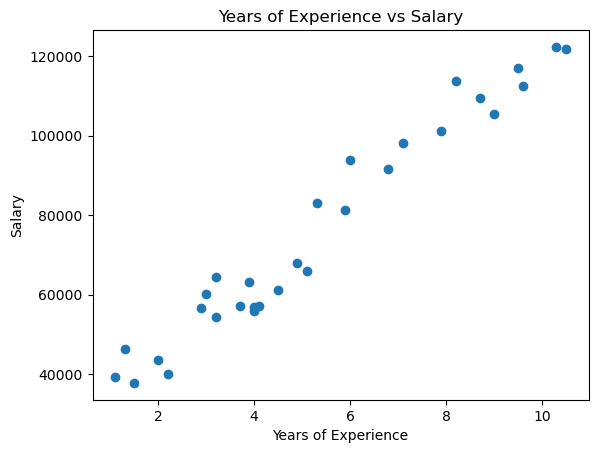

In [9]:
# Visualize the Dataset
plt.scatter(indep,dep)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size=1/3, random_state=0)

In [12]:
# Poynomial Feature Transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [13]:
# Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [15]:
# Model Parameters
print("Intercept/Bias:",model.intercept_)
print("Coefficients/Slope:",model.coef_)

Intercept/Bias: [28150.60458913]
Coefficients/Slope: [[   0.         8712.28148584   57.78239507]]


In [16]:
# Predictions
y_pred = model.predict(x_test_poly)

In [18]:
# Model Evaluation
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2-score:",r2)

r2-score: 0.9742792461789879


C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


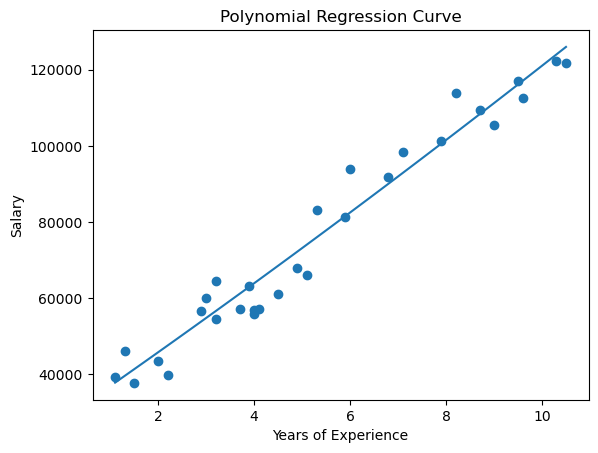

In [21]:
# Visualizing Polynomial Regression Curve
x_grid = np.linspace(indep.min(), indep.max(), 100).reshape(-1,1)
x_grid_poly = poly.transform(x_grid)
y_grid_pred = model.predict(x_grid_poly)

plt.scatter(indep, dep)
plt.plot(x_grid, y_grid_pred)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Polynomial Regression Curve")
plt.show()

In [23]:
# User Input Prediction
experience = float(input("Enter Years of Experience: "))
experience_poly = poly.transform([[experience]])

salary_prediction = model.predict(experience_poly)
print(f"Predicted Salary: {salary_prediction[0][0]}")

Enter Years of Experience:  2


Predicted Salary: 45806.29714108206


C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
